In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

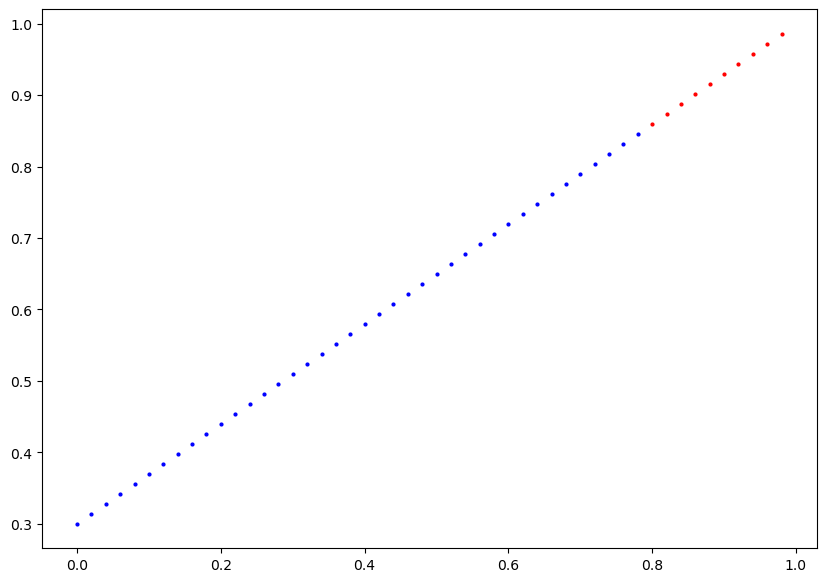

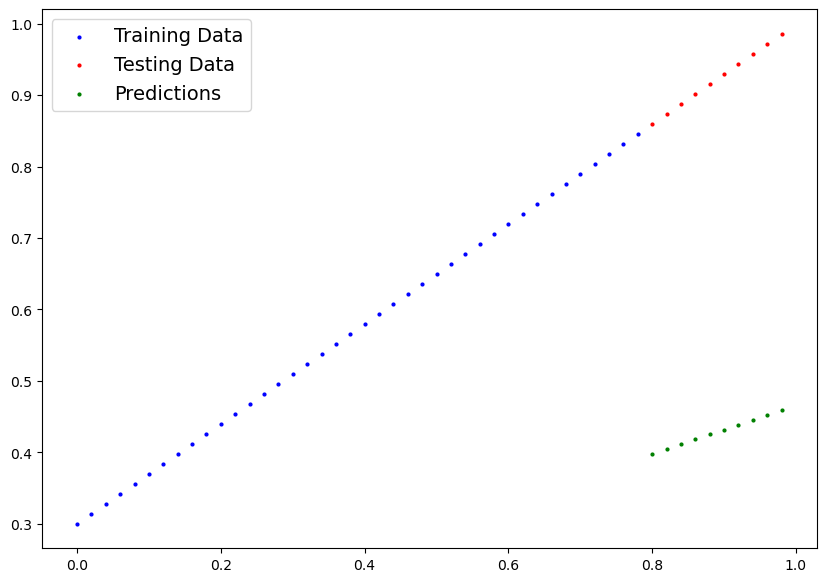

In [2]:
#Create
weight= 0.7
bias=0.3
start=0
end=1
step=0.02
X= torch.arange(start,end,step)
y=weight*X + bias
X[:10], y[:10]
train_split=int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y [train_split:]
len (X_train), len (y_train), len (X_test) , len (y_test)
X_train, y_train
#Data visualizations
def plot_predictions(train_data=X_train, train_labels=y_train,test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10,7))   
#plot training data in blue
    plt.scatter(train_data, train_labels, c="b",s=4, label='Training Data')

#plot test data in green
    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing Data")

#check predictions
    if predictions is not None:
        plt.scatter(test_data,predictions, c="g", s=4, label="Predictions")

#show the legend
        plt.legend(prop={"size":14});
plot_predictions();
#building a model
from torch import Tensor 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1, requires_grad=True, dtype= torch.float))
        self.bias=nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
#forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x+self.bias
#creating a random seed
torch.manual_seed(42)
model_0= LinearRegressionModel()
list(model_0.parameters())
#list named parameter
model_0.state_dict()
#Making predictions with model
with torch.inference_mode():
    y_preds=model_0(X_test).unsqueeze(dim=1)
y_preds
plot_predictions(predictions=y_preds)

OrderedDict([('weights', tensor([0.6808])), ('bias', tensor([0.3078]))])


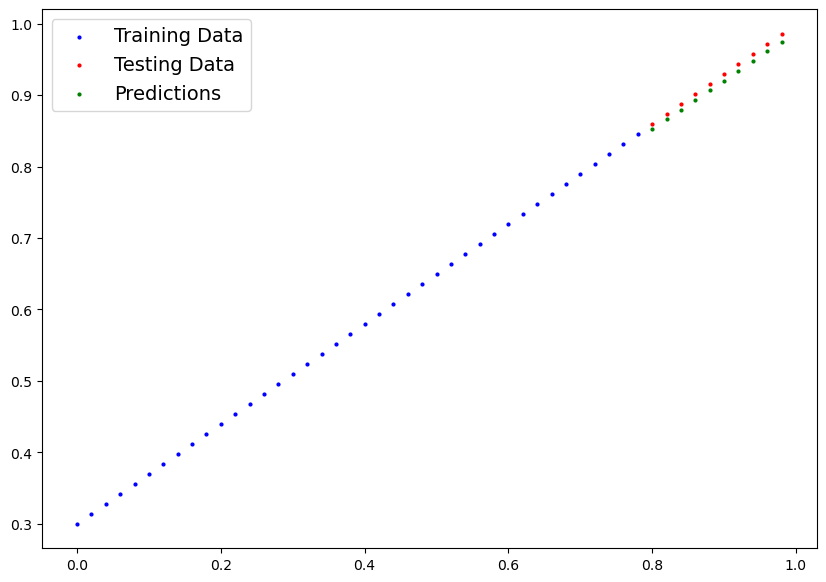

In [8]:
#set up a loss function
loss_fn=nn.L1Loss()
loss_fn
#setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
torch.manual_seed(42)
#Building a training loop and a testing loop in PyTorch
#Training 
epochs= 20 #hyperparameter / one loop through the data
#loop through the data
for epoch in range(epochs):
#set model to taining mode
    model_0.train() 
#1 forward pass
    y_pred=model_0(X_train)
#2 calculate the loss
    loss=loss_fn(y_pred, y_train)
    #print(f"Loss: {loss}" )
#3 optimizer zero grad
    optimizer.zero_grad()
#4 perform backpropagation
    loss.backward()
#5 optimizer step
    optimizer.step()
    
#print out model state_dict()
print(model_0.state_dict())
#plot
with torch.inference_mode():
    y_preds=model_0(X_test).unsqueeze(dim=1)
y_preds
plot_predictions(predictions=y_preds)

#Testing
model_0.eval()
with torch.inference_mode():
#forward pass
    test_pred=model_0(X_test)
#calculate the loss
    test_loss=loss_fn(test_pred, y_test)
if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}  ")
    print(model_0.state_dict())


In [14]:
#Saving our PyTorch model
from pathlib import Path

#1. Create moddel directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create modelsave path
MODEL_NAME="01_pytorch_model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

MODEL_SAVE_PATH

#3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

#lOADING A MODEL

model_0.state_dict()
loaded_model_0= LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


Saving model to: models\01_pytorch_model.pth


<All keys matched successfully>

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6808])), ('bias', tensor([0.3078]))])

In [16]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6808])), ('bias', tensor([0.3078]))])

In [19]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test).unsqueeze(dim=1)
loaded_model_preds

tensor([[0.8524],
        [0.8660],
        [0.8797],
        [0.8933],
        [0.9069],
        [0.9205],
        [0.9341],
        [0.9477],
        [0.9614],
        [0.9750]])

In [20]:
#Compare loaded model preds with original model preds
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [21]:
y_preds

tensor([[0.8524],
        [0.8660],
        [0.8797],
        [0.8933],
        [0.9069],
        [0.9205],
        [0.9341],
        [0.9477],
        [0.9614],
        [0.9750]])

In [23]:
#Putting it all together
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

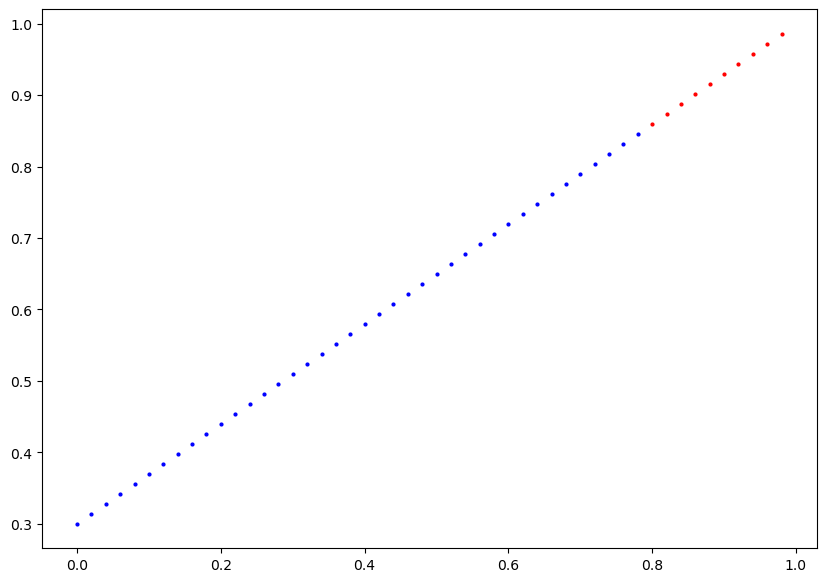

In [33]:
#Create some data using the linear regression formula y=mx+c
weight = 0.7
bias=0.3

#create range values
start = 0
end = 1
step = 0.02

#create X(labels) and y (features)
X = torch.arange(start, end, step). unsqueeze(dim=1)
y=weight*X+bias
X[:10], y[:10]


#split data
train_split= int (0.8*len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]
len(X_train), len (y_train), len (X_test), len(y_test)


#plot
plot_predictions(X_train, y_train, X_test, y_test)


#create a linear model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        #Use nn.Linear()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x:torch.Tensor)-> torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model_1= LinearRegressionModelV2()
model_1, model_1.state_dict()
model_1.state_dict()
    


OrderedDict([('linear_layer.weight', tensor([[0.6007]])), ('linear_layer.bias', tensor([0.3415]))])


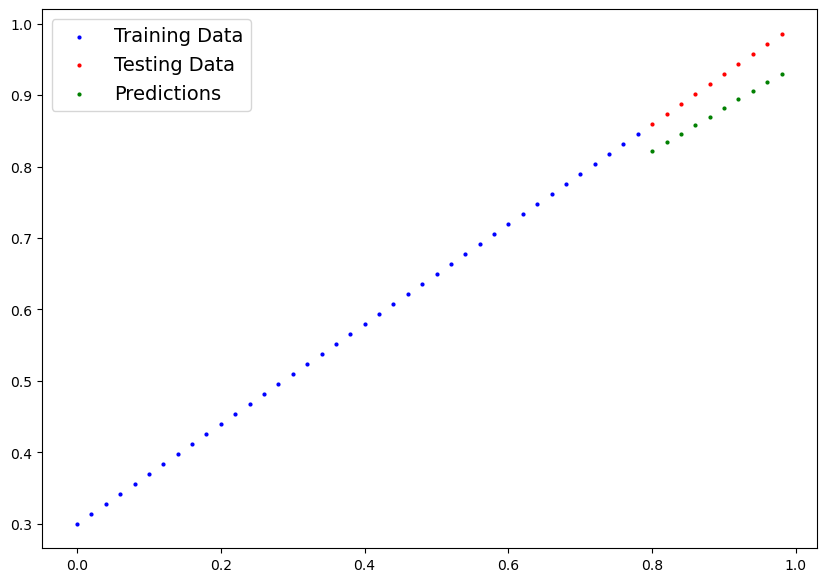

In [36]:
#training code

#set up a loss function
loss_fn=nn.L1Loss()
loss_fn
#setup an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

torch.manual_seed(42)
epochhs= 50
for epoch in range (epochs):
    model_1.train()
    y_pred=model_1(X_train)
    loss=loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(model_1.state_dict())
with torch.inference_mode():
    y_preds= model_1(X_test).unsqueeze(dim=1)
y_preds
plot_predictions(predictions=y_preds)

#Testing
model_1.eval()
with torch.inference_mode():
#forward pass
    test_pred=model_1(X_test)
#calculate the loss
    test_loss=loss_fn(test_pred, y_test)
if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}  ")
    print(model_1.state_dict())
